<a href="https://colab.research.google.com/github/mannam95/Deep_Learning_Programming/blob/main/Assignment11/Assignment_11_IDL_Pratical_Methodology_Meghana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Assignment**
1. Srinath Mannam (229750)
2. Meghana Rao (234907)
3. Govind Shukla (235192)



In [ ]:
import numpy as np
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [ ]:
os.chdir('/content/drive/MyDrive/IDL_Assignments/Assignment_11/cifar_attempts')
os.getcwd()

'/content/drive/MyDrive/IDL_Assignments/Assignment_11/cifar_attempts'

In [ ]:
cifar_10_class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Model


In [ ]:
def set_conv_model():
  input_shape = (32, 32, 3)
  num_classes = 10
  layer_list = [tf.keras.layers.Conv2D(64,(3, 3), padding='same', activation='relu',input_shape=input_shape),
                tf.keras.layers.MaxPool2D(),
                tf.keras.layers.Conv2D(128,(3, 3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(),
                tf.keras.layers.Conv2D(256,(3, 3), padding='same', activation='relu'),
                tf.keras.layers.MaxPool2D(),                
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.3),
                tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu),
                tf.keras.layers.Dense(32, activation=tf.nn.leaky_relu),
                tf.keras.layers.Dense(num_classes, activation='softmax')]
  model = tf.keras.Sequential(layer_list)
  return model

In [ ]:
def model_compile_fit_evaluate(train_data, train_labels, val_data, val_labels, test_data, test_labels, model):
  model.summary()

  #---model compile-----
  model.compile(
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
      )
  
  #---model fit------
  train_scores = model.fit(train_data, train_labels, batch_size=128, epochs=12, validation_data = (val_data, val_labels))

  #---model evaluate----
  test_scores = model.evaluate(test_data, test_labels)
  print("Test loss:", test_scores[0])
  print("Test accuracy:", test_scores[1])

#Data1


####Load data

In [ ]:
dataset1 = np.load("data1.npz")

In [ ]:
print("Dataset1 files: " + str(dataset1.files))

Dataset1 files: ['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


####Model train and evaluate

In [ ]:
conv_model = set_conv_model()
model_compile_fit_evaluate(dataset1['train_imgs'], dataset1['train_lbls'], dataset1['val_imgs'], dataset1['val_lbls'], dataset1['test_imgs'], dataset1['test_lbls'], conv_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

##Analysis Data1

###Observation

1. *Overfitting*: Train and Validation set accuarcy is high and Test accuracy is comparitively low.
2. *We can see that train and validation set does not contain cat(3) and horse(7) images.*


####**Do the labels match the examples?**
(cifar_10_class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

*Yes*



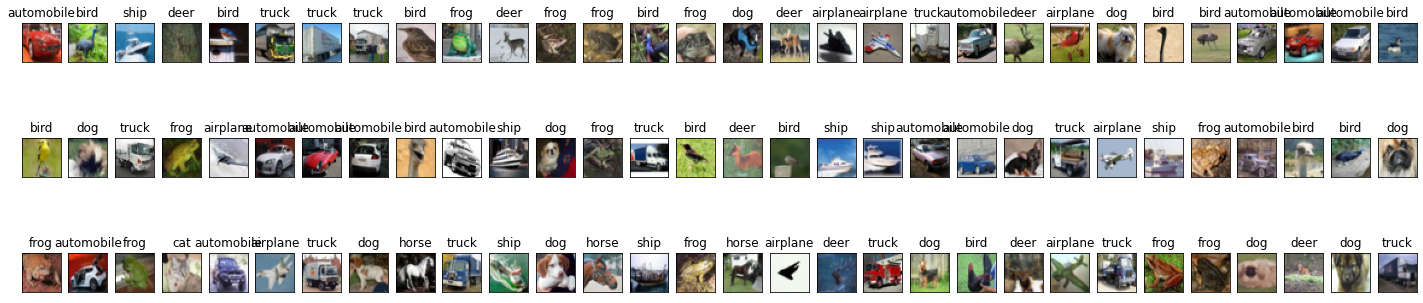

In [ ]:
n = 30
plt.figure(figsize=(25, 6))
for i in range(n):
  # display original
  axis = plt.subplot(3, n, i + 1)
  plt.imshow(dataset1['train_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset1['train_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  axis = plt.subplot(3, n, i + 1 + n)
  plt.imshow(dataset1['val_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset1['val_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  axis = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(dataset1['test_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset1['test_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

plt.show()

####**Do the train, validation and test sets follow the same distribution?**

*We can see that train and validation set does not contain cat(3) and horse(7) images.*

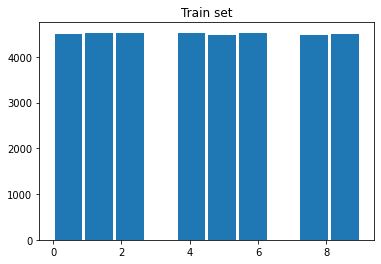

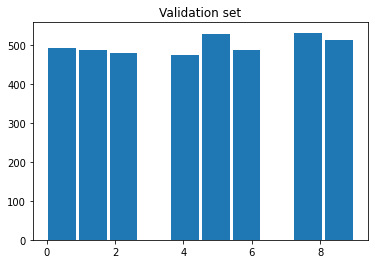

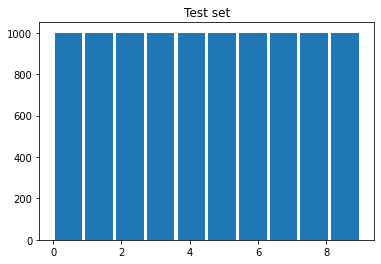

In [ ]:
plt.hist(x=dataset1['train_lbls'], rwidth=0.9)
plt.title('Train set')
plt.show()
plt.hist(x=dataset1['val_lbls'], rwidth=0.9)
plt.title('Validation set')
plt.show()
plt.hist(x=dataset1['test_lbls'], rwidth=0.9)
plt.title('Test set')
plt.show()

###**Are the different subsets disjunct?**
*Yes*

###**Are the sets balanced?**
*No*.
*Ration: [train(90%) val(10%)]-80% , test-10%*


In [ ]:
print("Train set size: ", str(len(dataset1['train_lbls'])))
print("Validation set size: ", str(len(dataset1['val_lbls'])))
print("Test set size: ", str(len(dataset1['test_lbls'])))
print("Total size: ", str(len(dataset1['train_lbls']) + len(dataset1['val_lbls']) + len(dataset1['test_lbls'])))

Train set size:  36004
Validation set size:  3996
Test set size:  10000
Total size:  50000


#Data2

####Load data

In [ ]:
dataset2 = np.load("data2.npz")

In [ ]:
print("Dataset2 files: " + str(dataset2.files))

Dataset2 files: ['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


####Model train and evaluate

In [ ]:
conv_model = set_conv_model()
model_compile_fit_evaluate(dataset2['train_imgs'], dataset2['train_lbls'], dataset2['val_imgs'], dataset2['val_lbls'], dataset2['test_imgs'], dataset2['test_lbls'], conv_model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256)       

##Analysis Data2

###Observation

*Overfitting*: Train and Validation set accuarcy is high and Test accuracy is comparitively low.


####**Do the labels match the examples?**
(cifar_10_class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

*Yes*



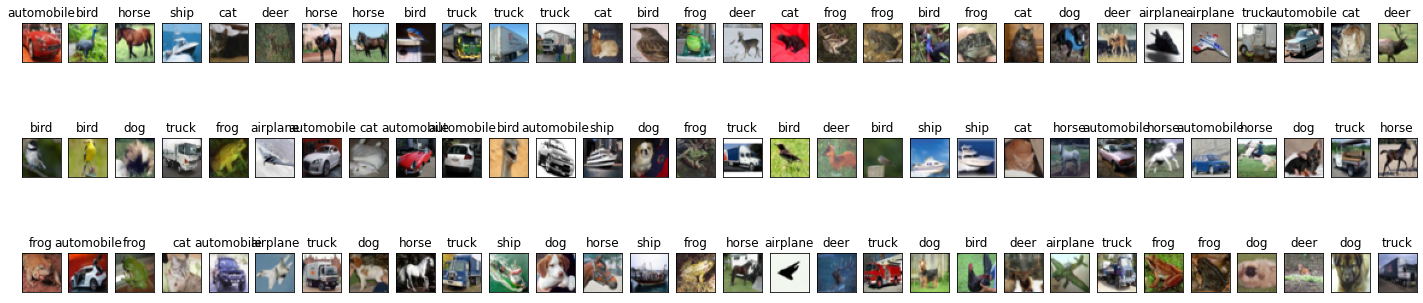

In [ ]:
n = 30
plt.figure(figsize=(25, 6))
for i in range(n):
  # display original
  axis = plt.subplot(3, n, i + 1)
  plt.imshow(dataset2['train_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset2['train_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  axis = plt.subplot(3, n, i + 1 + n)
  plt.imshow(dataset2['val_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset2['val_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  axis = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(dataset2['test_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset2['test_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

plt.show()

####**Do the train, validation and test sets follow the same distribution?**

*Slight imbalance in class distribution of the validation set.*

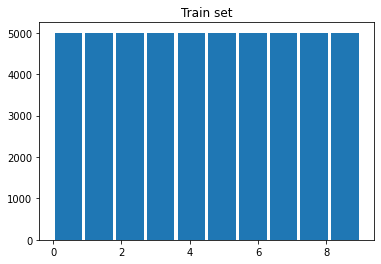

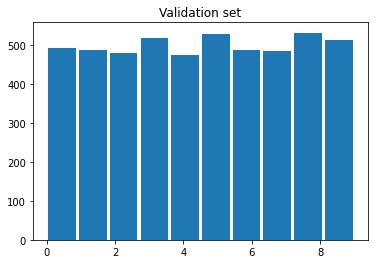

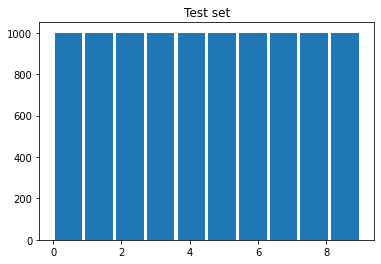

In [ ]:
plt.hist(x=dataset2['train_lbls'], rwidth=0.9)
plt.title('Train set')
plt.show()
plt.hist(x=dataset2['val_lbls'], rwidth=0.9)
plt.title('Validation set')
plt.show()
plt.hist(x=dataset2['test_lbls'], rwidth=0.9)
plt.title('Test set')
plt.show()

###**Are the different subsets disjunct?**
*No*

###**Are the sets balanced?**
*Ration: [train(90%) val(10%)]-85% , test-15%*


In [ ]:
print("Train set size: ", str(len(dataset2['train_lbls'])))
print("Validation set size: ", str(len(dataset2['val_lbls'])))
print("Test set size: ", str(len(dataset2['test_lbls'])))
print("Total size: ", str(len(dataset2['train_lbls']) + len(dataset2['val_lbls']) + len(dataset2['test_lbls'])))

Train set size:  50000
Validation set size:  5000
Test set size:  10000
Total size:  65000


#Data3

#### Load data

In [ ]:
dataset3 = np.load("data3.npz")

In [ ]:
print("Dataset3 files: " + str(dataset3.files))

Dataset3 files: ['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


#### Model train and evaluate

In [ ]:
conv_model = set_conv_model()
model_compile_fit_evaluate(dataset3['train_imgs'], dataset3['train_lbls'], dataset3['val_imgs'], dataset3['val_lbls'], dataset3['test_imgs'], dataset3['test_lbls'], conv_model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 256)       

##Analysis Data3

###Observation

1. *Overfitting*: Train and Validation set accuarcy is high and Test accuracy is comparitively very low. 
2. Test images looks a bit darker than train and validation images.


####**Do the labels match the examples?**
(cifar_10_class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

*Yes*



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

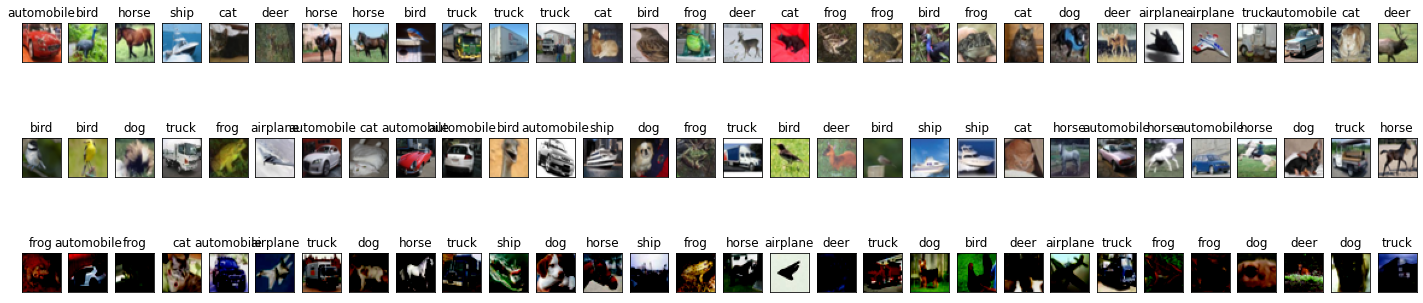

In [ ]:
n = 30
plt.figure(figsize=(25, 6))
for i in range(n):
  # display original
  axis = plt.subplot(3, n, i + 1)
  plt.imshow(dataset3['train_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset3['train_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  axis = plt.subplot(3, n, i + 1 + n)
  plt.imshow(dataset3['val_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset3['val_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  axis = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(dataset3['test_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset3['test_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

plt.show()

####**Do the train, validation and test sets follow the same distribution?**

*Slight imbalance in class distribution of the validation set.*

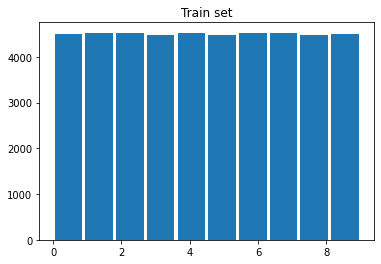

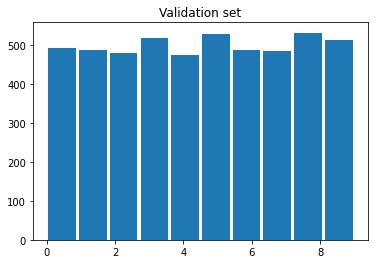

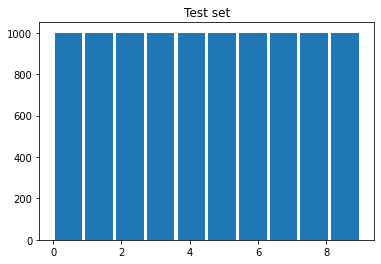

In [ ]:
plt.hist(x=dataset3['train_lbls'], rwidth=0.9)
plt.title('Train set')
plt.show()
plt.hist(x=dataset3['val_lbls'], rwidth=0.9)
plt.title('Validation set')
plt.show()
plt.hist(x=dataset3['test_lbls'], rwidth=0.9)
plt.title('Test set')
plt.show()

###**Are the different subsets disjunct?**
*No*

###**Are the sets balanced?**
*Ration: [train(90%) val(10%)]-83% , test-17%*


In [ ]:
print("Train set size: ", str(len(dataset3['train_lbls'])))
print("Validation set size: ", str(len(dataset3['val_lbls'])))
print("Test set size: ", str(len(dataset3['test_lbls'])))
print("Total size: ", str(len(dataset3['train_lbls']) + len(dataset3['val_lbls']) + len(dataset3['test_lbls'])))

Train set size:  45000
Validation set size:  5000
Test set size:  10000
Total size:  60000


###Observation

1. *Overfitting*: Train and Validation set accuarcy is high and Test accuracy is comparitively very low. 
2. Test images looks a bit darker than train and validation images.


####**Do the labels match the examples?**
(cifar_10_class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

*Yes*



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

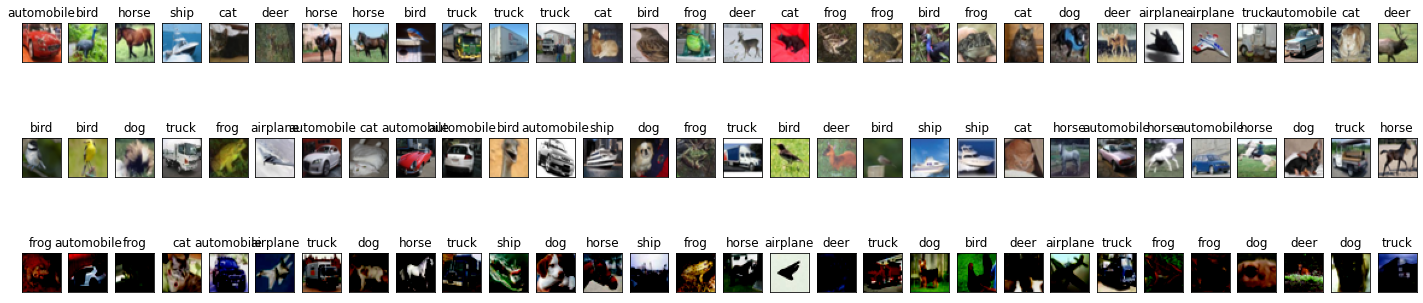

In [ ]:
n = 30
plt.figure(figsize=(25, 6))
for i in range(n):
  # display original
  axis = plt.subplot(3, n, i + 1)
  plt.imshow(dataset3['train_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset3['train_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  axis = plt.subplot(3, n, i + 1 + n)
  plt.imshow(dataset3['val_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset3['val_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  axis = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(dataset3['test_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset3['test_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

plt.show()

####**Do the train, validation and test sets follow the same distribution?**

*Slight imbalance in class distribution of the validation set.*

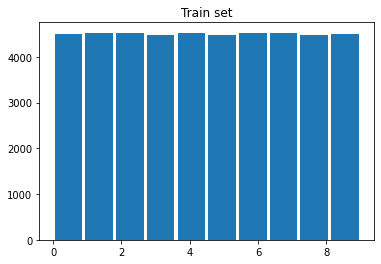

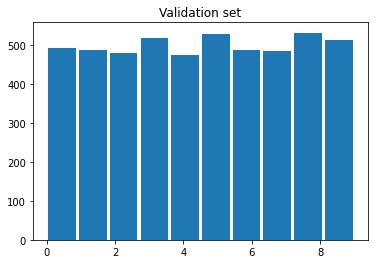

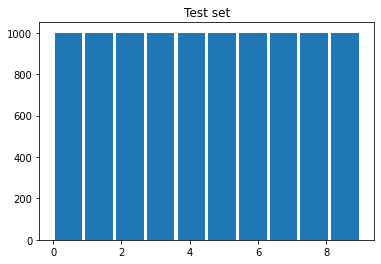

In [ ]:
plt.hist(x=dataset3['train_lbls'], rwidth=0.9)
plt.title('Train set')
plt.show()
plt.hist(x=dataset3['val_lbls'], rwidth=0.9)
plt.title('Validation set')
plt.show()
plt.hist(x=dataset3['test_lbls'], rwidth=0.9)
plt.title('Test set')
plt.show()

###**Are the different subsets disjunct?**
*No*

###**Are the sets balanced?**
*Ration: [train(90%) val(10%)]-83% , test-17%*


In [ ]:
print("Train set size: ", str(len(dataset3['train_lbls'])))
print("Validation set size: ", str(len(dataset3['val_lbls'])))
print("Test set size: ", str(len(dataset3['test_lbls'])))
print("Total size: ", str(len(dataset3['train_lbls']) + len(dataset3['val_lbls']) + len(dataset3['test_lbls'])))

Train set size:  45000
Validation set size:  5000
Test set size:  10000
Total size:  60000


#Data4

####Load data

In [ ]:
dataset4 = np.load("data4.npz")

In [ ]:
print("Dataset4 files: " + str(dataset4.files))

Dataset4 files: ['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


####Model train and evaluate

In [ ]:
conv_model = set_conv_model()
model_compile_fit_evaluate(dataset4['train_imgs'], dataset4['train_lbls'], dataset4['val_imgs'], dataset4['val_lbls'], dataset4['test_imgs'], dataset4['test_lbls'], conv_model)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 256)       

##Analysis Data4

###Observation
1. Train and Validation set accuarcy is 1 and Test accuracy is very low. 
2. Same images for all the classes are used in train and validation set. Since the model is trained on same images Acuuracy is 1. 
3. Different images for all the classes are used in test set. Because of which the performance is  low.




####**Do the labels match the examples?**
(cifar_10_class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

*Yes*



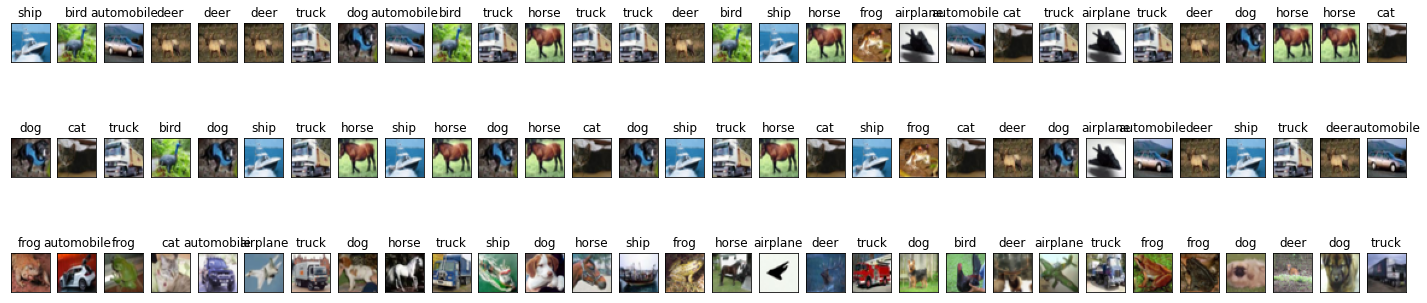

In [ ]:
n = 30
plt.figure(figsize=(25, 6))
for i in range(n):
  # display original
  axis = plt.subplot(3, n, i + 1)
  plt.imshow(dataset4['train_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset4['train_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  axis = plt.subplot(3, n, i + 1 + n)
  plt.imshow(dataset4['val_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset4['val_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

  axis = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(dataset4['test_imgs'][i+5])
  plt.title(cifar_10_class_labels[dataset4['test_lbls'][i+5]])
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

plt.show()

####**Do the train, validation and test sets follow the same distribution?**

*Yes*

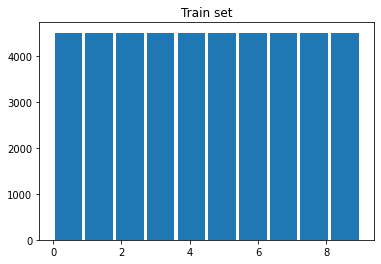

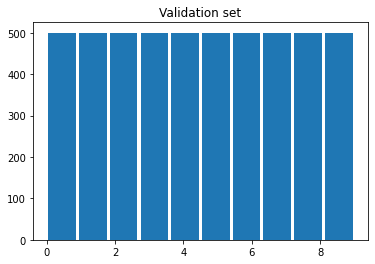

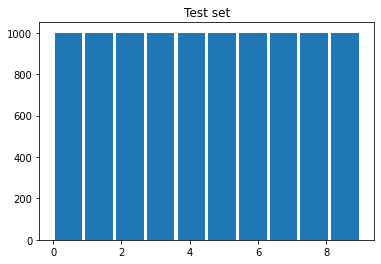

In [ ]:
plt.hist(x=dataset4['train_lbls'], rwidth=0.9)
plt.title('Train set')
plt.show()
plt.hist(x=dataset4['val_lbls'], rwidth=0.9)
plt.title('Validation set')
plt.show()
plt.hist(x=dataset4['test_lbls'], rwidth=0.9)
plt.title('Test set')
plt.show()

###**Are the different subsets disjunct?**
*No*

###**Are the sets balanced?**
*Ration: [train(90%) val(10%)]-83% , test-17%*


In [ ]:
print("Train set size: ", str(len(dataset4['train_lbls'])))
print("Validation set size: ", str(len(dataset4['val_lbls'])))
print("Test set size: ", str(len(dataset4['test_lbls'])))
print("Total size: ", str(len(dataset4['train_lbls']) + len(dataset4['val_lbls']) + len(dataset4['test_lbls'])))

Train set size:  45000
Validation set size:  5000
Test set size:  10000
Total size:  60000
